# single differential $CC1p$ cross-section from mcc8.7 mc/mc sample 

In [1]:
import sys; sys.path.insert(0, '../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline
sns.set(font_scale=2);sns.set_style("whitegrid");

versions:
{   'OffBeam': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'OnBeam': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'data date': '2018_05_11',
    'date': '2018_05_11',
    'overlay date': '2018_05_11'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.0512441465374 = N(POT on beam)/N(POT MC)


In [2]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/Xsec/Figures/1d_differential_Xsec/'

## load mc and data

In [38]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev'
extra_name='mc_mc'
extra_label='mc/mc overlay'
versions['data date'] = '2018_08_16'
versions['beam on'] = 'prod_reco_optfilter_bnb_v12_unblind_mcc8'
versions['beam off'] = 'prod_reco_optfilter_extbnb_v12_mcc8_dev'
selected_overlay,selected_overlay_concat,selected_CC1p,genie_CC1p,selected_beam_on,selected_beam_off = load_mc_and_data(extra_name=extra_name)

found selected_cosmic.csv, loading it...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prod_reco_optfilter_bnb_v12_unblind_mcc8_2018_08_16_mc_mcselected_on_beam.csv and found the file...
checked /Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_08_16_mc_mcselected_genie_CC1p.csv and found the file...
2061 selected CC1p events overlay


In [39]:
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
                              +versions['overlay date']+'/'
                              +versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
Nevents['OnBeam POT']   = 4.908e+19
Nevents['overlay']      = np.sum(summary.Nevents)
Nevents['overlay POT']  = np.sum(summary.POT)
Nevents['f(POT)']       = Nevents['OnBeam POT']/Nevents['overlay POT']
print "Nevents['f(POT)']:",Nevents['f(POT)']

Nevents['f(POT)']: 0.242369596942


## 1d cross-section

done looping.
done smearing selected_CC1p
saved  selected_CC1p  to
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_08_16_mc_mcselected_CC1p.csv
done looping.
done smearing selected_genie_CC1p
saved  selected_genie_CC1p  to
/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_08_16_mc_mcselected_genie_CC1p.csv
done smearing MC generated and selected


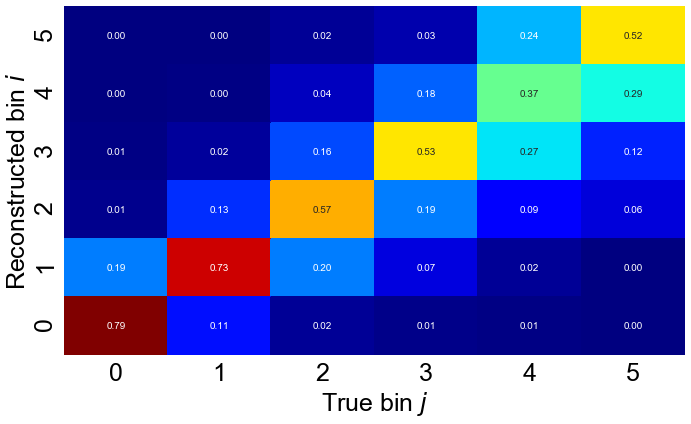

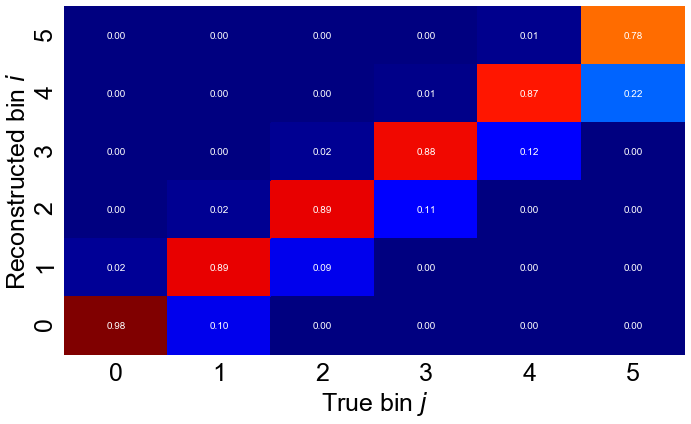

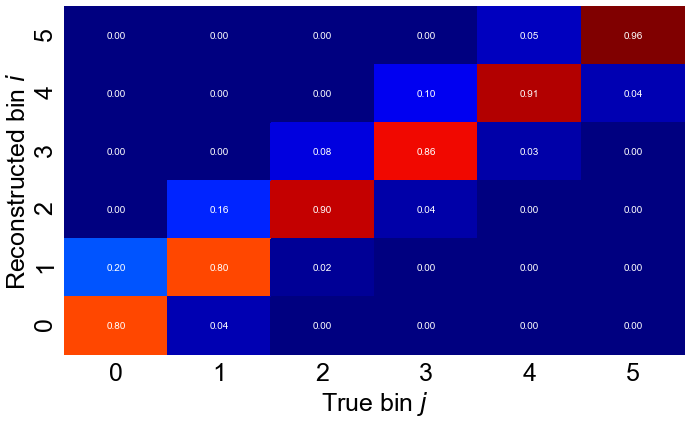

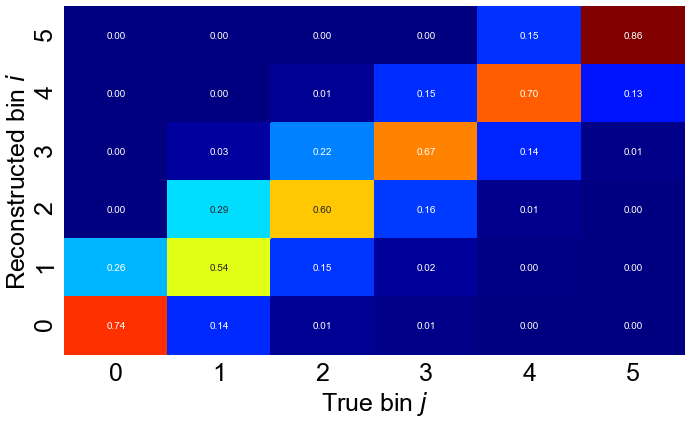

In [40]:
migration_maps = build_migration_maps(selected_CC1p=selected_CC1p)
smear_MC_gen_sel(migration_maps=migration_maps,selected_CC1p=selected_CC1p,genie_CC1p=genie_CC1p,extra_name=extra_name)
print 'done smearing MC generated and selected'

In [41]:
prefix = Paths['selected events'] + versions['Overlay'] + '_' + versions['overlay date'] + '_' + extra_name
print prefix+'selected_genie_CC1p.csv'
genie_CC1p = pd.read_csv(prefix+'selected_genie_CC1p.csv')
selected_CC1p = pd.read_csv(prefix+'selected_CC1p.csv')

/Users/erezcohen/Desktop/uBoone/CCQEanalysis/Xsec/selected_events/prodgenie_bnb_nu_cosmic_uboone_mcc8.7_reco2_dev_2018_08_16_mc_mcselected_genie_CC1p.csv


# Xsec.

In [42]:
# def full_chain_Xsec_diff_1d(observable='Pmu',truth_var='truth_Pmu',recovar='reco_Pmu_mcs',smearedvar='',mul=1,ax=None
#                             ,mc_scale_factor=1,do_draw_all=False,debug=0,extra_name=''):
#     bins=Bins[observable]; vlabel=vlabels[observable]; Vlabel=Vlabels[observable]; units=Units[observable]
#     xlabel=Vlabel+' ['+units+']' if units is not None else Vlabel

#     # (1) background subtraction    
#     subtrsact_bkg_1d(selected_beam_off=selected_beam_off,selected_beam_on=selected_beam_on
#                      ,selected_overlay_concat=selected_overlay_concat,selected_CC1p=selected_CC1p
#                      ,bins=bins,xlabel=xlabel,xvar=recovar,debug=debug,do_draw=do_draw_all,extra_name=extra_name)
    
#     # (2) efficiency:
#     compute_effiency(genie_CC1p=genie_CC1p,selected_CC1p=selected_CC1p
#                      ,bins=bins,xvar=smearedvar,xlabel=xlabel,ylabel=r'$\bar{\epsilon}$',do_draw=do_draw_all,mul=mul,debug=debug,extra_name=extra_name)    
    
#     # (3) cross-section
#     Xsec_diff_1d(observable=observable,recovar=recovar,smearedvar=smearedvar,ax=ax,mc_scale_factor=mc_scale_factor,debug=0,extra_name=extra_name)

done computing Xsec.
done computing Xsec.
done computing Xsec.
done computing Xsec.


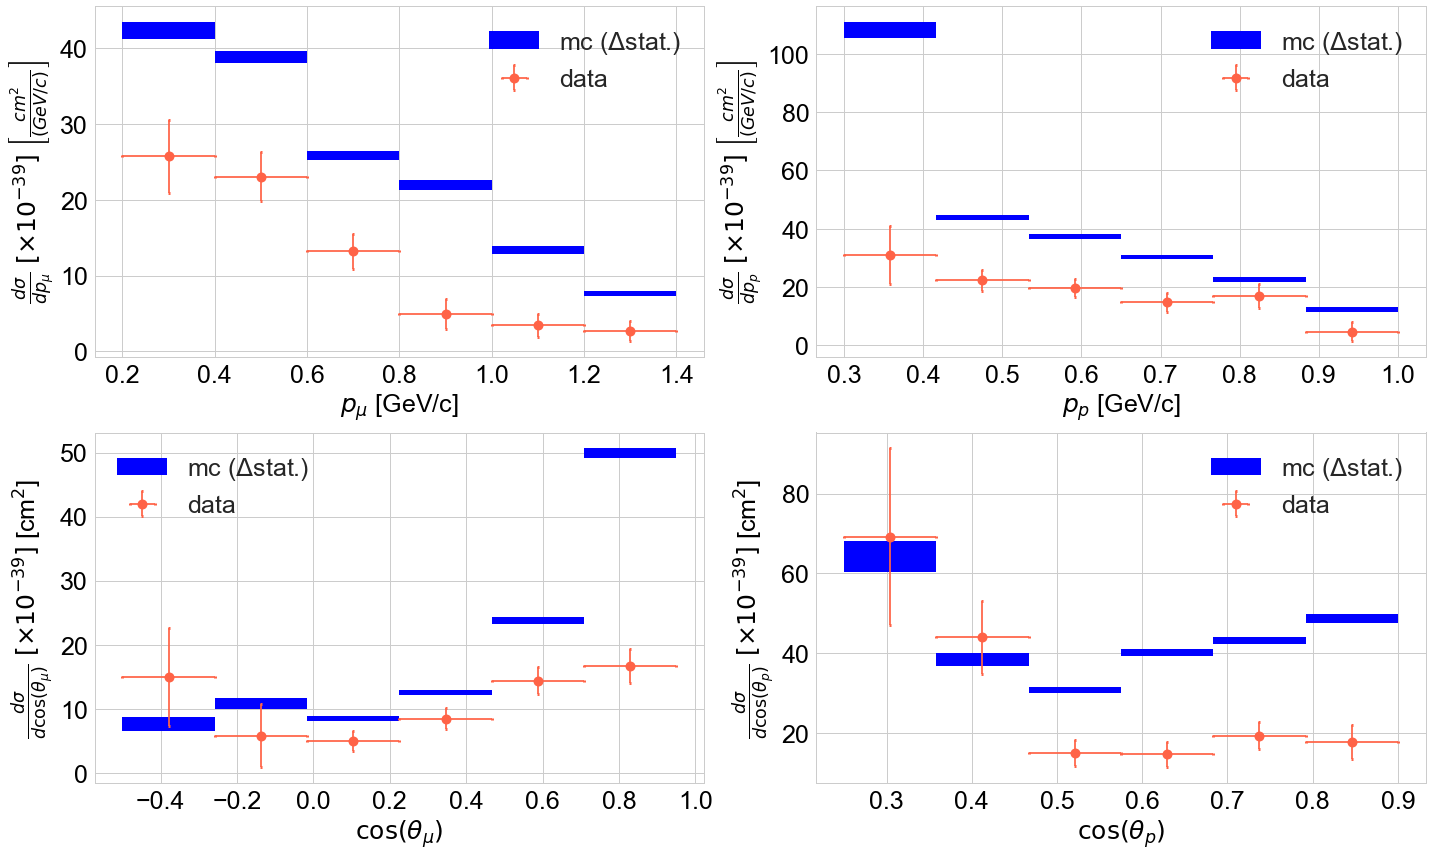

In [44]:
fig=plt.figure(figsize=(20,12))
full_chain_Xsec_diff_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='smeared_Pmu',ax=fig.add_subplot(2,2,1),do_draw_all=False,extra_name=extra_name,debug=0)
full_chain_Xsec_diff_1d(observable='Pp',recovar='reco_Pp',smearedvar='smeared_Pp',ax=fig.add_subplot(2,2,2),do_draw_all=False,extra_name=extra_name)
full_chain_Xsec_diff_1d(observable='cos(theta(mu))',recovar='reco_Pmu_cos_theta',smearedvar='smeared_Pmu_cos_theta',ax=fig.add_subplot(2,2,3),do_draw_all=False,extra_name=extra_name)
full_chain_Xsec_diff_1d(observable='cos(theta(p))',recovar='reco_Pp_cos_theta',smearedvar='smeared_Pp_cos_theta',ax=fig.add_subplot(2,2,4),do_draw_all=False,extra_name=extra_name)
plt.tight_layout()

In [47]:
# def Xsec_ratio_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='',debug=0,ax=None,extra_name='mc_mc',extra_label='mc/mc overlay'):
#     bins=Bins[observable]; vlabel=vlabels[observable]; Vlabel=Vlabels[observable]; units=Units[observable]
#     xlabel=Vlabel+' ['+units+']' if units is not None else Vlabel
#     mid = 0.5*(bins[1:]+bins[:-1]); bin_width=0.5*(mid[1]-mid[0])
    
#     h,herr = dict(),dict()
    
#     h['nominal Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     herr['nominal Xsec'] = np.loadtxt(Paths['1d Xsec'] + "Xec_err_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     if debug: print 'read',"Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1)
#     h['modified Xsec'] = np.loadtxt(Paths['1d Xsec'] + extra_name + "Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv", delimiter=",")
#     herr['modified Xsec'] = np.loadtxt(Paths['1d Xsec'] + extra_name+ "Xec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv", delimiter=",")
#     if debug: print 'read', extra_name+"Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv"

#     h['nominal mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     herr['nominal mc'] = np.loadtxt(Paths['1d Xsec'] + "mc_cc1p_Xsec_err_%s_%d_bins.csv"%(smearedvar,len(bins)-1), delimiter=",")
#     if debug: print 'read',"mc_cc1p_Xsec_%s_%d_bins.csv"%(smearedvar,len(bins)-1)
#     h['modified mc'] = np.loadtxt(Paths['1d Xsec'] +  extra_name+"mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv", delimiter=",")
#     herr['modified mc'] = np.loadtxt(Paths['1d Xsec'] +  extra_name+"mc_cc1p_Xsec_err_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv", delimiter=",")
#     if debug: print 'read', extra_name+"mc_cc1p_Xsec_%s_%d_bins"%(smearedvar,len(bins)-1)+".csv"

#     print 'done reading Xsec.'
#     if ax is None:
#         fig,ax = plt.subplots(figsize=(9.708,6))
#     for slabel,color in zip(['mc','Xsec'],[Colors['CC1p'],Colors['beam on']]):
#         h['ratio '+slabel] = h['modified '+slabel]/h['nominal '+slabel]
#         herr['ratio '+slabel] = h['ratio '+slabel]*np.sqrt( np.square(herr['nominal '+slabel]/h['nominal '+slabel]) 
#                                                            + np.square(herr['modified '+slabel]/h['modified '+slabel]) )
#         if debug:
#             print "h[nominal "+slabel+"]:",h['nominal '+slabel]
#             print "herr[nominal "+slabel+"]:",herr['nominal '+slabel]
#             print "h[modified "+slabel+"]:",h['modified '+slabel]
#             print "herr[modified "+slabel+"]:",herr['modified '+slabel]
#             print "h[ratio "+slabel+"]:",h['ratio '+slabel]
#             print "herr[ratio "+slabel+"]:",herr['ratio '+slabel]
#         ax.errorbar( x=mid , xerr=bin_width, y=h['ratio '+slabel], yerr=herr['ratio '+slabel] 
#                     , fmt='o', markersize=10 , color=color, capsize=1, capthick=3, label='data')    
#     set_axes(ax,xlabel,y_label=r'Xsec. ratio',do_add_legend=False,title=extra_label)    
#     print 'done ploting Xsec. ratio'

done reading Xsec.
done ploting Xsec. ratio
done reading Xsec.
done ploting Xsec. ratio
done reading Xsec.
done ploting Xsec. ratio
done reading Xsec.
done ploting Xsec. ratio


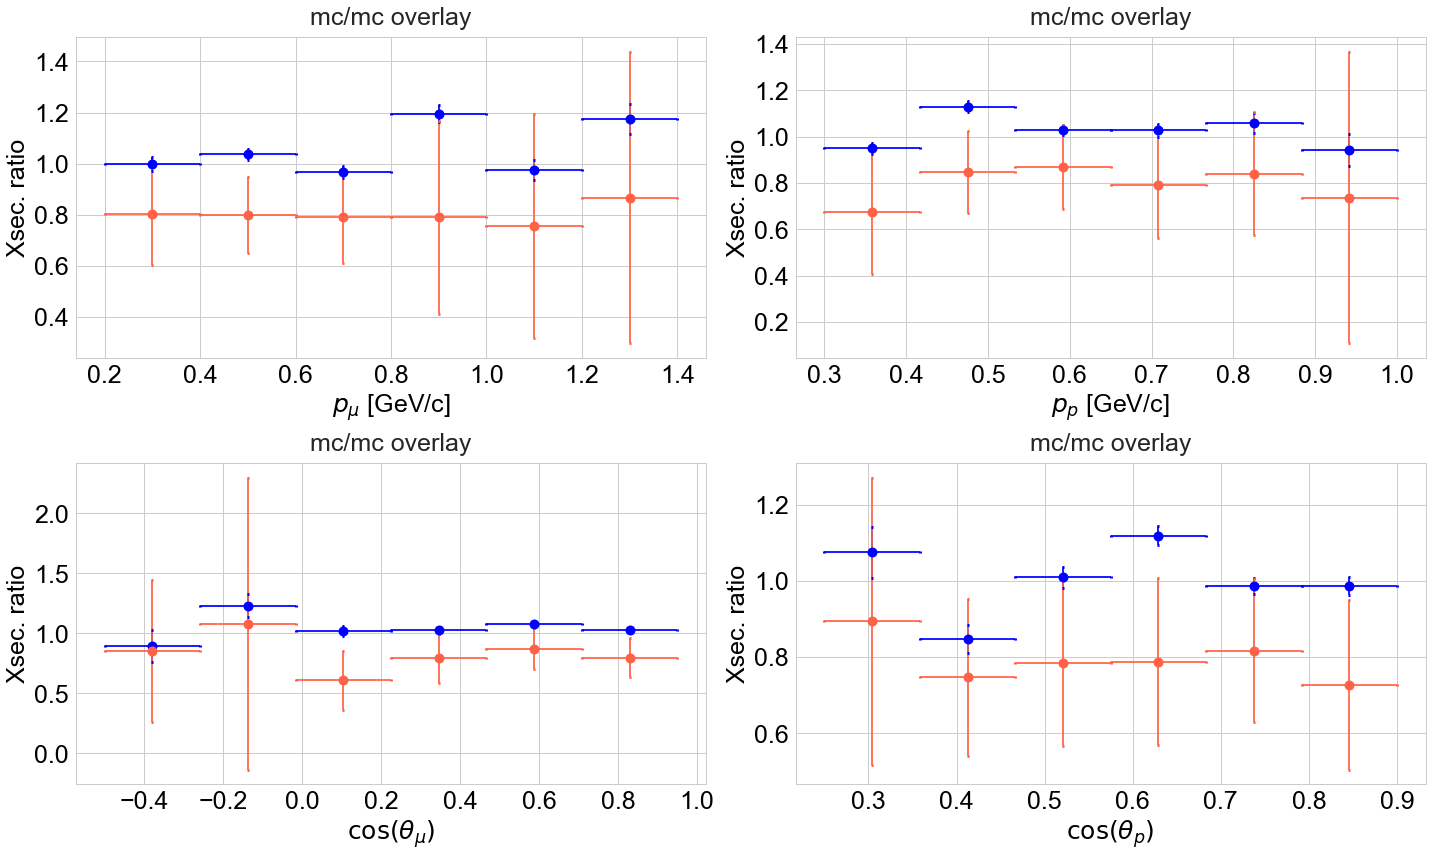

In [52]:
fig=plt.figure(figsize=(20,12))
ax=fig.add_subplot(2,2,1)
Xsec_ratio_1d(observable='Pmu',recovar='reco_Pmu_mcs',smearedvar='smeared_Pmu',ax=ax,extra_name=extra_name,extra_label=extra_label,debug=0)
ax=fig.add_subplot(2,2,2)
Xsec_ratio_1d(observable='Pp',recovar='reco_Pp',smearedvar='smeared_Pp',ax=ax,extra_name=extra_name,extra_label=extra_label)
ax=fig.add_subplot(2,2,3)
Xsec_ratio_1d(observable='cos(theta(mu))',recovar='reco_Pmu_cos_theta',smearedvar='smeared_Pmu_cos_theta',ax=ax,extra_name=extra_name,extra_label=extra_label)
ax=fig.add_subplot(2,2,4)
Xsec_ratio_1d(observable='cos(theta(p))',recovar='reco_Pp_cos_theta',smearedvar='smeared_Pp_cos_theta',ax=ax,extra_name=extra_name,extra_label=extra_label)
plt.tight_layout()